#  Clustering Methods with SciPy (Python)

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Clustering Methods with SciPy/"

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [3]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.cluster.vq import kmeans, vq, whiten

import random, timeit

import matplotlib.image as img

from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import TfidfVectorizer


In [4]:
# plot 1 image
def plot_1(image1, left=0, bottom=0, right=1, top=1, wspace=0, hspace=0, format_img=".jpg"):
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 2 images horizontally
def plot_2(image1, image2, left=0, bottom=0, right=2.2, top=1, wspace=0, hspace=0.05, format_img=".jpg"):
    plt.subplot(1, 2, 1)
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    image = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 3 images horizontally
def plot_3(image1, image2, image3, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 3, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()
    
# plot 4 images horizontally
def plot_4(image1, image2, image3, image4, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 4, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 4)
    imagem = plt.imread(data_folder + (image4+format_img))
    plt.axis('off')
    plt.imshow(imagem)    
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

##    CHAPTER 1  - Introduction to Clustering


Before you are ready to classify news articles, you need to be introduced to the basics of clustering. This chapter familiarizes you with a class of machine learning algorithms called unsupervised learning and then introduces you to clustering, one of the popular unsupervised learning algorithms. You will know about two popular clustering techniques - hierarchical clustering and k-means clustering. The chapter concludes with basic pre-processing steps before you start clustering data.

#### Exercício 1 - Unsupervised learning: basics

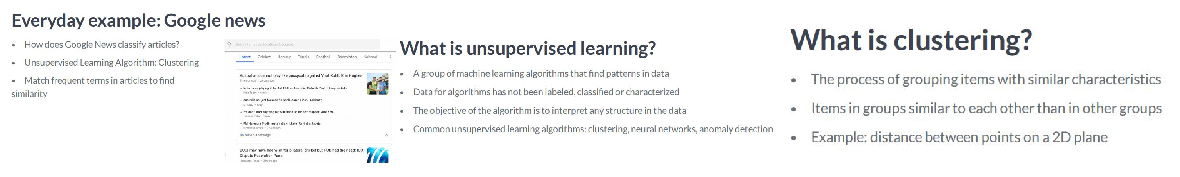

In [5]:
#vídeo

plot_3('google_news', 'uns_learning', 'clust')

Exercício 2

In [6]:
# Unsupervised learning in real world

# Which of the following examples can be solved with unsupervised learning?
print("""Segmentation of learners at DataCamp based on courses they complete. The training data has no labels""")

Segmentation of learners at DataCamp based on courses they complete. The training data has no labels


Exercício 3

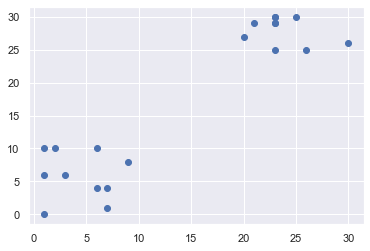

Notice the areas where the sightings are dense. This indicates that there is not one, but two legendary Pokémon 
out there


In [7]:
# Pokémon sightings

# There have been reports of sightings of rare, legendary Pokémon. You have been asked to investigate. Plot the coordinates
# of sightings to find out where the Pokémon might be. 

x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

# Create a scatter plot
plt.scatter(x, y)
plt.show()
print("""Notice the areas where the sightings are dense. This indicates that there is not one, but two legendary Pokémon 
out there""")

#### Exercício 4 - Basics of cluster analysis

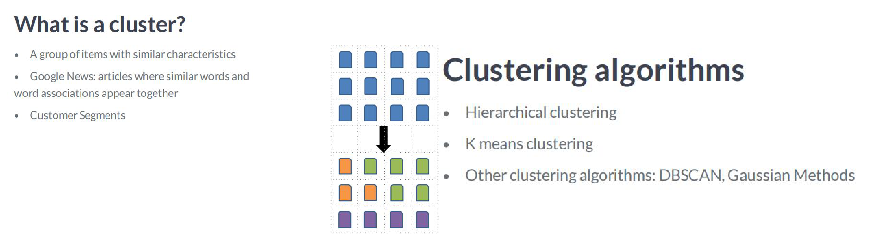


Hierarchical clustering in SciPy:


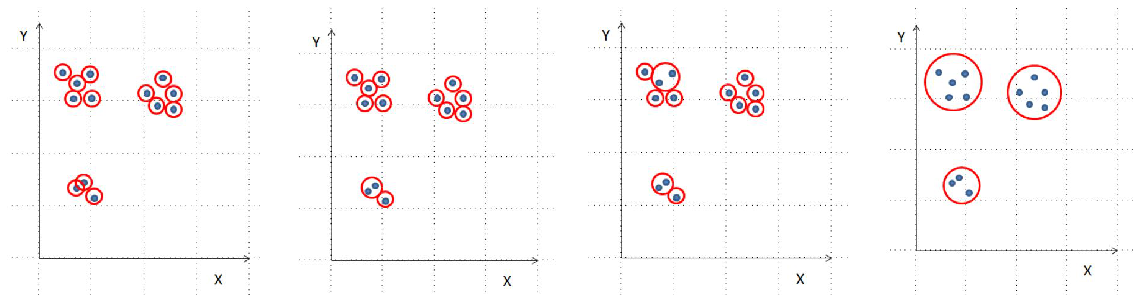

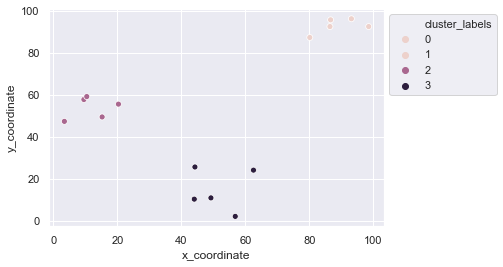


K-means clustering in SciPy:


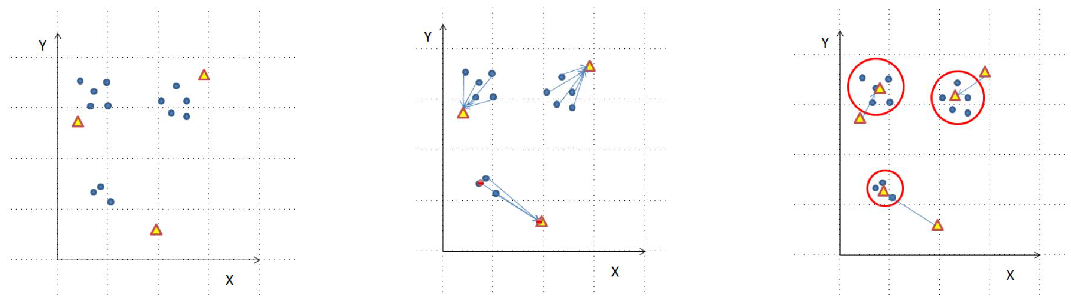

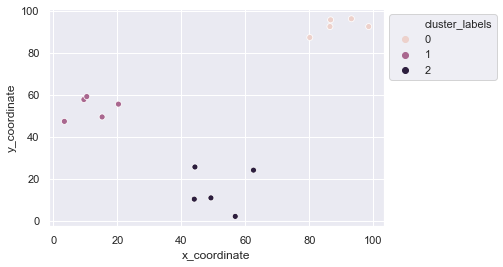

In [8]:
#vídeo

plot_2('what_cluster', 'clustering_algorithms', right=2)

#####################################################################################################################
print("=================================================================================================================\n")

print("Hierarchical clustering in SciPy:")

plot_4('hierarch_1', 'hierarch_2', 'hierarch_2.5', 'hierarch_3', bottom=0)

from scipy.cluster.hierarchy import linkage, fcluster

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates, 'y_coordinate': y_coordinates})

Z = linkage(df, 'ward')   # method=’ward’ uses the Ward variance minimization algorithm. 

df['cluster_labels'] = fcluster(Z, 3, criterion='maxclust') # Form flat clusters from the hierarchical clustering defined
                                                            # by the given linkage matrix.

sns.scatterplot(x='x_coordinate', y='y_coordinate', hue='cluster_labels', data = df)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()



#####################################################################################################################
print("=================================================================================================================\n")

print("K-means clustering in SciPy:")

plot_3('kmeans_1', 'kmeans_2', 'kmeans_3', bottom=0)

from scipy.cluster.vq import kmeans, vq
import random

random.seed((1000,2000))
x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates, 'y_coordinate': y_coordinates})

centroids, _ = kmeans(df, 3)

df['cluster_labels'], _ = vq(df, centroids)

sns.scatterplot(x='x_coordinate', y='y_coordinate', hue='cluster_labels', data = df)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Exercício 5

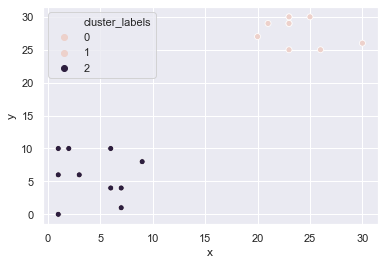

Notice that the cluster labels are plotted with different colors. You will notice that the resulting plot has an
extra cluster labelled 0 in the legend. This will be explained later in the course.


In [9]:
# Pokémon sightings: hierarchical clustering

df = pd.DataFrame({'x': [ 9,  6,  2,  3,  1,  7,  1,  6,  1,  7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23],
                  'y': [ 8,  4, 10,  6,  0,  4, 10, 10,  6,  1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]})

# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()
print("""Notice that the cluster labels are plotted with different colors. You will notice that the resulting plot has an
extra cluster labelled 0 in the legend. This will be explained later in the course.""")

Exercício 6

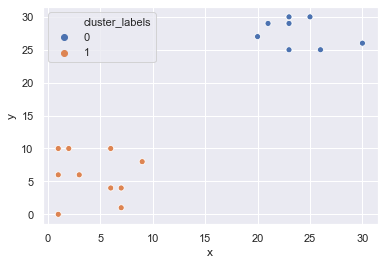

Notice that in this case, the results of both types of clustering are similar. We will look at distinctly different
results later in the course.


In [10]:
# Pokémon sightings: k-means clustering

df = pd.DataFrame({'x': [ 9,  6,  2,  3,  1,  7,  1,  6,  1,  7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23],
                  'y': [ 8,  4, 10,  6,  0,  4, 10, 10,  6,  1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]})

df['x'] = df['x'].astype('float')  # for scipy we need to do this

# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids, _ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()
print("""Notice that in this case, the results of both types of clustering are similar. We will look at distinctly different
results later in the course.""")

#### Exercício 7 - Data preparation for cluster analysis

Normalization of data:


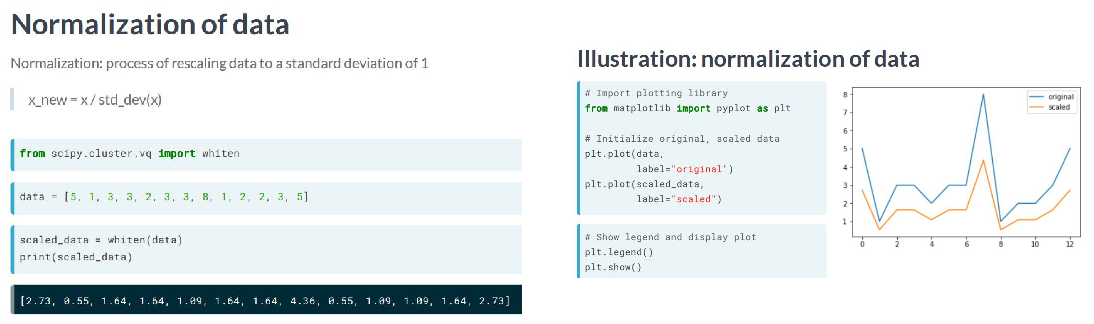


Scaled data:
 [2.72733941 0.54546788 1.63640365 1.63640365 1.09093577 1.63640365
 1.63640365 4.36374306 0.54546788 1.09093577 1.09093577 1.63640365
 2.72733941]


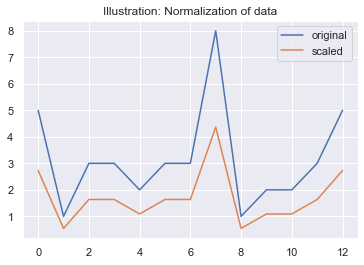

In [11]:
#vídeo

# plot_1('data_prep_1', right=1.3)
##############################################################
# print("===========================================================================================================")

# Normalization of data
#  - Normalization: process of rescaling data to a standard deviation of 1

print("Normalization of data:")

plot_2('data_prep_2', 'data_prep_3', wspace=0.1, right=2.5, bottom=-0.3)

x_new = x / np.std(x)

from scipy.cluster.vq import whiten
data = [5, 1, 3, 3, 2, 3, 3, 8, 1, 2, 2, 3, 5]
scaled_data = whiten(data)
print("\nScaled data:\n", scaled_data)

plt.plot(data, label= "original")
plt.plot(scaled_data, label= "scaled")
plt.title('Illustration: Normalization of data')
plt.legend()
plt.show()

Exercício 8

In [12]:
# Normalize basic list data

# goals_for is a list of goals scored by a football team in their last ten matches.

# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


Exercício 9

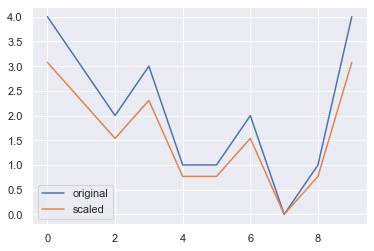

In [13]:
# Visualize normalized data

# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

Exercício 10

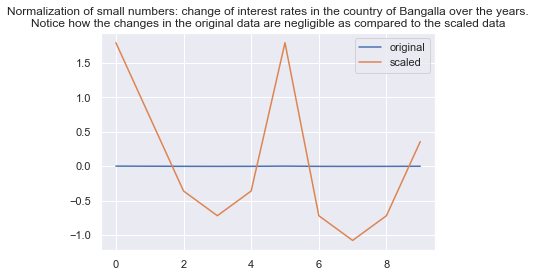

In [14]:
# Normalization of small numbers

# In this exercise, you will look at the treatment of fractional numbers - the change of interest rates in the country of
# Bangalla over the years.

# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')
plt.title("""Normalization of small numbers: change of interest rates in the country of Bangalla over the years.
Notice how the changes in the original data are negligible as compared to the scaled data""")
plt.legend()
plt.show()

Exercício 11

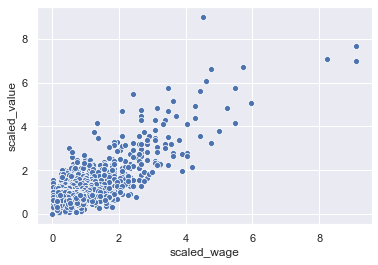

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064

As you can see the scaled values have a standard deviation of 1.


In [15]:
# FIFA 18: Normalize data

fifa = pd.read_csv(data_folder + "fifa_18_sample_data.csv")

# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
sns.scatterplot('scaled_wage', 'scaled_value', data=fifa)
plt.show()

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())
print("\nAs you can see the scaled values have a standard deviation of 1.")

# CHAPTER 2 - Hierarchical Clustering


This chapter focuses on a popular clustering algorithm - hierarchical clustering - and its implementation in SciPy. In addition to the procedure to perform hierarchical clustering, it attempts to help you answer an important question - how many clusters are present in your data? The chapter concludes with a discussion on the limitations of hierarchical clustering and discusses considerations while using hierarchical clustering.

#### Exercício 1 - Basics of hierarchical clustering

Choose the 'metric' of dissimilarity (Euclidean, correlational, ...) and the 'linkage/method' by which the 
dissimilarity is computed.


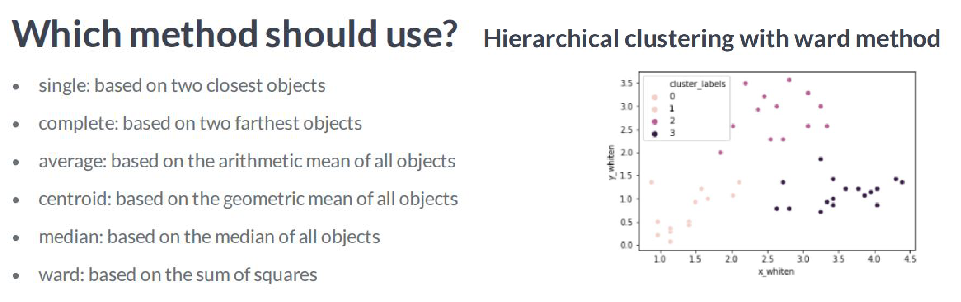

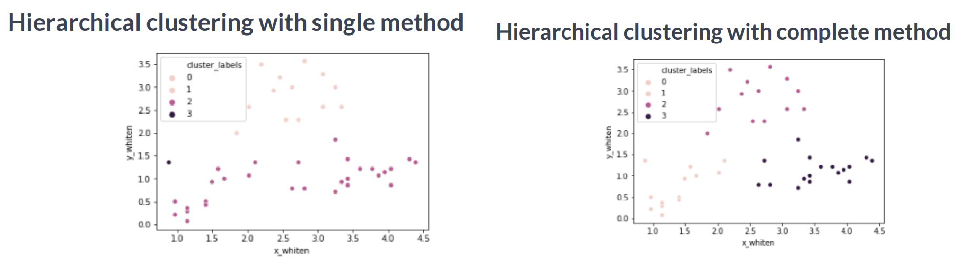

Final thoughts on selecting a method:
 - No one right method for all
 - Need to carefully understand the distribution of data


In [16]:
#vídeo

# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

print("""Choose the 'metric' of dissimilarity (Euclidean, correlational, ...) and the 'linkage/method' by which the 
dissimilarity is computed.""")

# Creating a distance matrix using linkage
distance_matrix = linkage(df, method='single', metric='euclidean', optimal_ordering=False)

# method : how to calculate the proximity of clusters
# metric : distance metric
# optimal_ordering : order data points

# Which method should use?
plot_2('method_hierarch', 'ward')
plot_2('single', 'complete', wspace=0.05)

# Create cluster labels with fcluster
fcluster_ex = fcluster(distance_matrix, t=3, criterion='inconsistent')

# distance_matrix : output of linkage() method
# num_clusters (t) : number of clusters
# criterion : how to decide thresholds to form clusters

print("""Final thoughts on selecting a method:
 - No one right method for all
 - Need to carefully understand the distribution of data""")

Exercício 2

scale (sklearn): mean 0.0 and std 0.9999999999999998
whiten (scipy.cluster.vq): mean 1.0 and std 0.9999999999999998


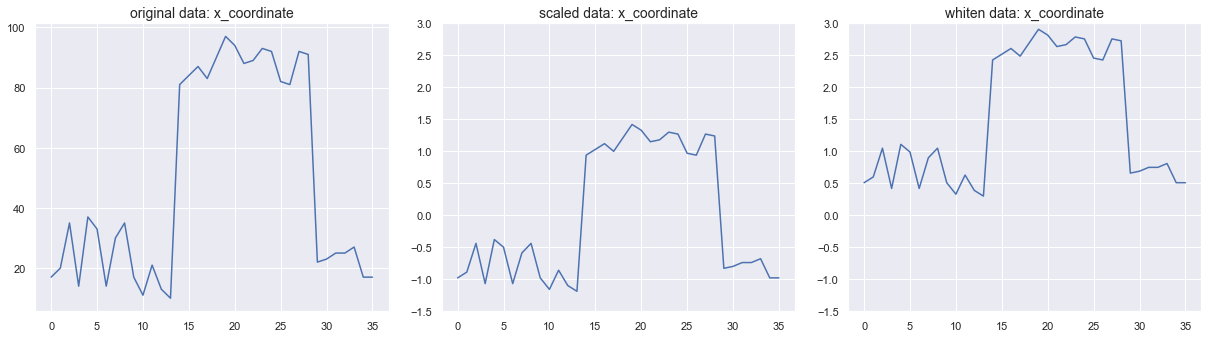

In [17]:
# data

# Comic-Con is an annual comic-based convention held in major cities in the world. 
# You have the data of last year's footfall, the number of people at the convention ground at a given time. 
# You would like to decide the location of your stall to maximize sales. 
# Using the ward method, apply hierarchical clustering to find the two points of attraction in the area.

from scipy.cluster.vq import whiten
from sklearn.preprocessing import scale

comic_con = pd.DataFrame({'x_coordinate': [17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87,
   83, 90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27, 17, 17],
                          'y_coordinate': [4, 6, 0, 0, 4, 3, 1, 6, 5, 4, 6,  10, 8, 10, 97, 94, 99, 95, 95, 97, 99, 99,
                                           94, 99, 90, 98, 100, 93, 98, 15, 10, 0, 10, 7, 17, 15]})

comic_con['x_scaled'] = whiten(comic_con.x_coordinate)
comic_con['y_scaled'] = whiten(comic_con.y_coordinate)

# standardization / normalization
print("scale (sklearn): mean {} and std {}".format(round(np.mean(scale(comic_con.x_coordinate)), 0), 
                                           np.std(scale(comic_con.x_coordinate))))

print("whiten (scipy.cluster.vq): mean {} and std {}".format(round(np.mean(whiten(comic_con.x_coordinate)), 0), 
                                           np.std(whiten(comic_con.x_coordinate))))

plt.subplot(1, 3, 1)
plt.plot((comic_con.x_coordinate))
plt.title('original data: x_coordinate', fontsize=14)
plt.subplot(1, 3, 2)
plt.plot(scale(comic_con.x_coordinate))
plt.title('scaled data: x_coordinate', fontsize=14)
plt.ylim(-1.5, 3)
plt.subplot(1, 3, 3)
plt.plot(whiten(comic_con.x_coordinate))
plt.title('whiten data: x_coordinate', fontsize=14)
plt.ylim(-1.5, 3)
plt.subplots_adjust(left=0, bottom=0, right=2.7, top=1, wspace=0.15, hspace=0.1)
plt.show()
###################################################################################

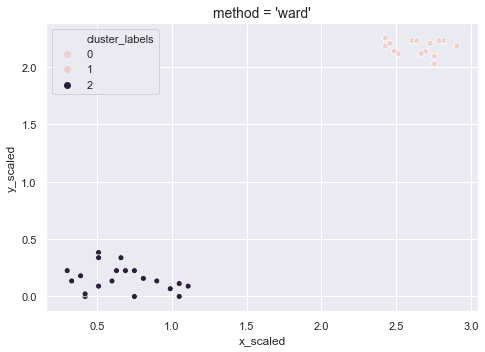

Notice the two clusters correspond to the points of attractions in the figure towards the bottom (a stage) and 
the top right (an interesting stall).


In [18]:
# Hierarchical clustering: ward method

# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data = comic_con)
plt.title("method = 'ward'", fontsize=14)

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.15, hspace=0.1)
plt.show()

print("""Notice the two clusters correspond to the points of attractions in the figure towards the bottom (a stage) and 
the top right (an interesting stall).""")

Exercício 3

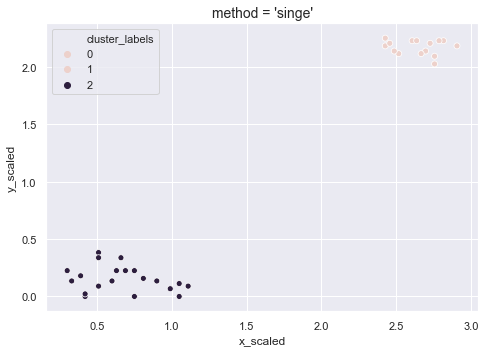

Notice that in this example, the clusters formed are not different from the ones created using the ward method.


In [19]:
# Hierarchical clustering: single method

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data = comic_con)
plt.title("method = 'singe'", fontsize=14)

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.15, hspace=0.1)
plt.show()

print("""Notice that in this example, the clusters formed are not different from the ones created using the ward method.""")

Exercício 4

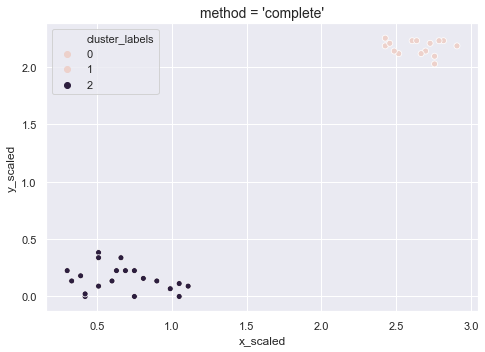

Coincidentally, the clusters formed are not different from the ward or single methods.


In [20]:
# Hierarchical clustering: complete method

# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'complete', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data = comic_con)
plt.title("method = 'complete'", fontsize=14)

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.15, hspace=0.1)
plt.show()

print("""Coincidentally, the clusters formed are not different from the ward or single methods.""")

#### Exercício 5 - Visualize clusters

Comparison of both methods of visualization


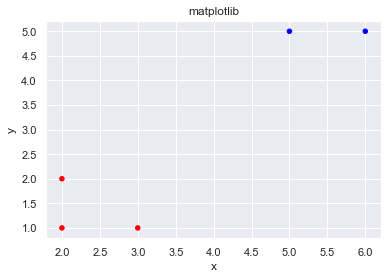

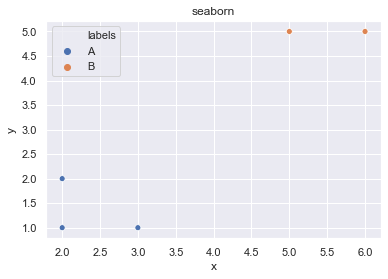

seaborn is more convenient


In [21]:
#vídeo

# Why visualize clusters?
#  - Try to make sense of the clusters formed
#  - An additional step in validation of clusters
#  - Spot trends in data

# An introduction to seaborn

# Visualize clusters with matplotlib

# Visualize clusters with seaborn

####

print("Comparison of both methods of visualization")

df = pd.DataFrame({'x': [2, 3, 5, 6, 2], 'y': [1, 1, 5, 5, 2], 'labels': ['A','A','B','B','A']})
colors = {'A':'red','B':'blue'}

df.plot.scatter(x='x', y='y', c=df['labels'].apply(lambda x: colors[x]))
plt.title('matplotlib')
plt.show()

sns.scatterplot(x='x', y='y', hue='labels',data=df) 
plt.title('seaborn')
plt.show()
print("seaborn is more convenient")

Exercício 6

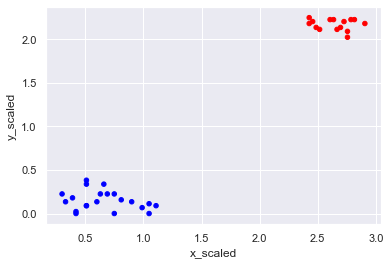

In [22]:
# Visualize clusters with matplotlib

# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x = 'x_scaled', y = 'y_scaled', c = comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

Exercício 7

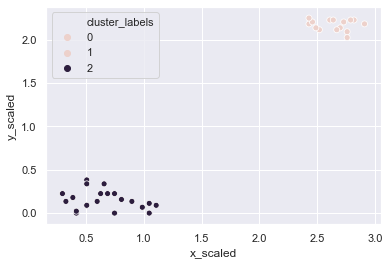

In [23]:
# Visualize clusters with seaborn

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data = comic_con)
plt.show()

#### Exercício 8 - How many clusters?

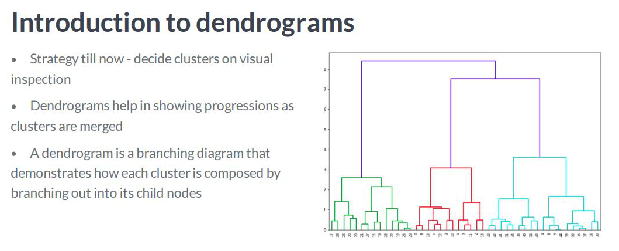

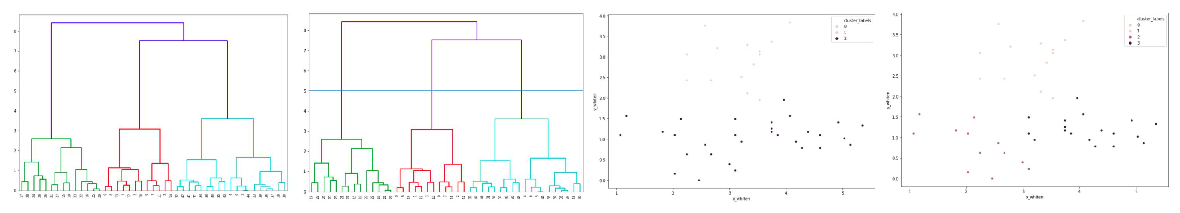

In [24]:
#vídeo

# Introduction to dendrograms
plot_1('intro_dend', right=1.4)

from scipy.cluster.hierarchy import dendrogram

Z = linkage(comic_con[['x_coordinate', 'y_coordinate']], method='ward', metric='euclidean')
dn = dendrogram(Z)
# plt.show()

plot_4('dend_1', 'dend_2', '3_clusters', '4_clusters')

Exercício 9

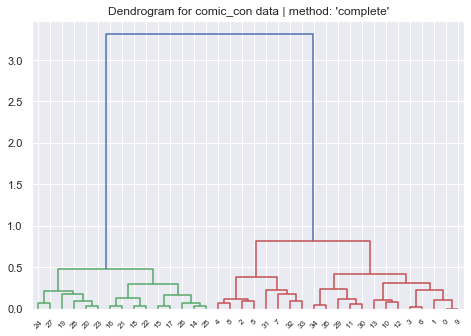

Notice the significant difference between the inter-cluster distances beyond the top two clusters.


In [25]:
# Create a dendrogram

# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'complete', metric = 'euclidean')

dn = dendrogram(distance_matrix)

# Display the dendogram
plt.title("Dendrogram for comic_con data | method: 'complete'")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.15, hspace=0.1)
plt.show()

print("""Notice the significant difference between the inter-cluster distances beyond the top two clusters.""")

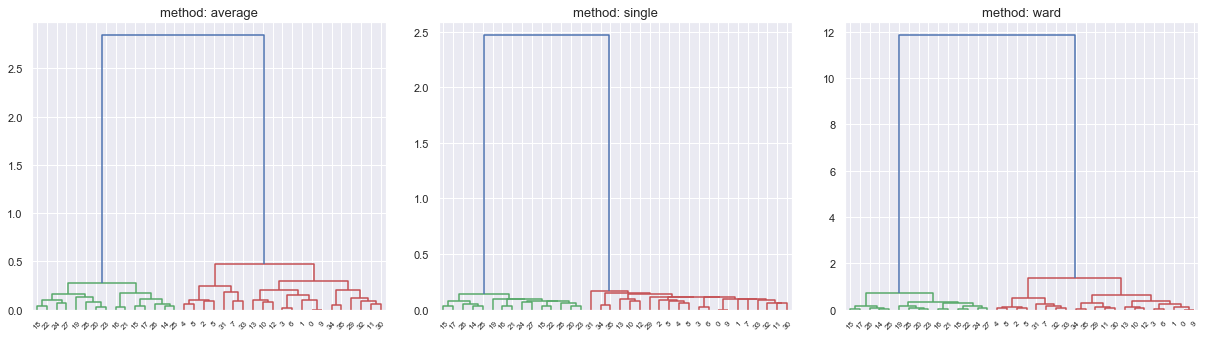

In [26]:
# other methods
methods = ['average', 'single', 'ward']
for i in methods:
    plt.subplot(1, len(methods), methods.index(i)+1)
    distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = i, metric = 'euclidean')
    dn = dendrogram(distance_matrix)
    plt.title("method: " + i, fontsize=13)    
plt.subplots_adjust(left=0, bottom=0, right=2.7, top=1, wspace=0.15, hspace=0.1)
plt.show()

Exercício 10

In [27]:
# How many clusters in comic con data?
# Given the dendrogram from the last exercise, how many clusters can you see in the data?
print("2 clusters")

2 clusters


#### Exercício 11 - Limitations of hierarchical clustering

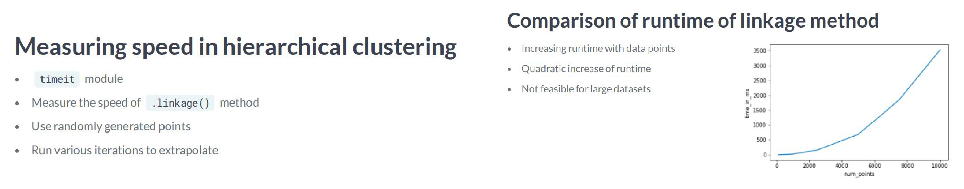

3.25 ms ± 773 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



In [28]:
#vídeo

plot_2('speed_hierarch', 'runtime_comparison', wspace=0.1, bottom=-0.5)

# Use of timeit module
from scipy.cluster.hierarchy import linkage
import pandas as pd
import random, timeit

points = 100
df = pd.DataFrame({'x': random.sample(range(0, points), points), 
                   'y': random.sample(range(0, points), points)})

%timeit linkage(df[['x', 'y']], method ='ward', metric ='euclidean')

print("""""")

Exercício 12

In [29]:
# Timing run of hierarchical clustering

# How long does it take to the run the linkage function on the comic con data?

%timeit linkage(comic_con[['x_scaled', 'y_scaled']], method ='complete', metric ='euclidean')

1.63 ms ± 300 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Exercício 13

In [30]:
# FIFA 18: exploring defenders

fifa = pd.read_csv(data_folder + "fifa_18_dataset.csv")[:5000]   # just a 5000 sample
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])
fifa.head()
###########################################################################

sliding_tackle  aggression  scaled_sliding_tackle  scaled_aggression
0              23          63               0.967671           3.723843
1              26          48               1.093889           2.837214
2              33          56               1.388398           3.310083
3              38          78               1.598762           4.610472
4              11          29               0.462799           1.714150

Cluster centers of each cluster:

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            2.986331           4.354148
2                            0.740142           1.938290
3                            1.341895           3.622458


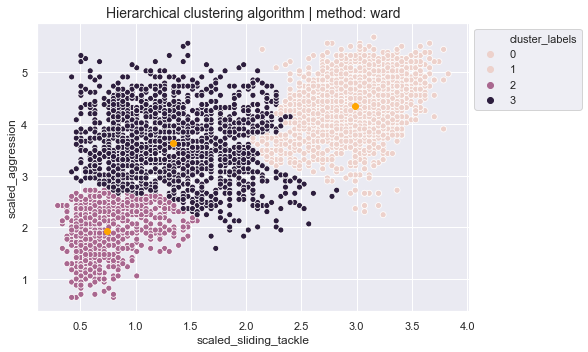

Notice how long it took to run hierarchical clustering on a few thousand data points. 
In the next chapter, you will explore clusters in data through k-means clustering.

Wall time: 1.96 s


In [31]:
%%time
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# How to display cluster centers of each cluster
print("Cluster centers of each cluster:\n")
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.title('Hierarchical clustering algorithm | method: ward', fontsize=14)

##########################################################
# plot the cluster centers of each cluster
for i in [0, 1, 2]:
    cluster = list(fifa[['scaled_sliding_tackle', 'scaled_aggression', 
                       'cluster_labels']].groupby('cluster_labels').mean().iloc[i, :])
    plt.plot(cluster[0], cluster[1], c='orange', marker='o')
##########################################################

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.15, hspace=0.1)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

print("""Notice how long it took to run hierarchical clustering on a few thousand data points. 
In the next chapter, you will explore clusters in data through k-means clustering.\n""")

# Chapter 3 - K-Means Clustering

This chapter introduces a different clustering algorithm - k-means clustering - and its implementation in SciPy. K-means clustering overcomes the biggest drawback of hierarchical clustering that was discussed in the last chapter. As dendrograms are specific to hierarchical clustering, this chapter discusses one method to find the number of clusters before running k-means clustering. The chapter concludes with a discussion on the limitations of k-means clustering and discusses considerations while using this algorithm.

#### Exercício 1 - Basics of k-means clustering

Why k-means clustering?:
 - A critical drawback of hierarchical clustering: runtime
 - K means runs signicantly faster on large datasets



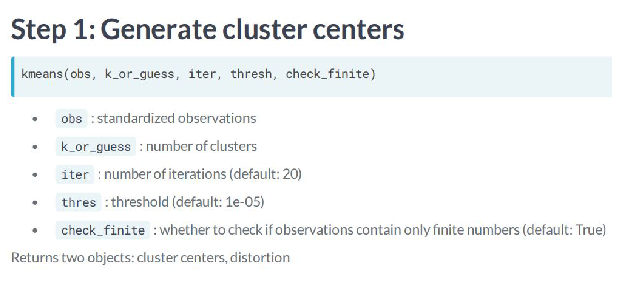

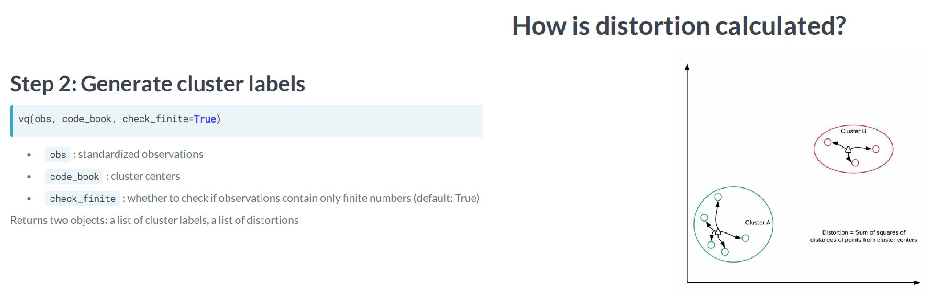

A note on distortions:
 - kmeans returns a single value of distortions
 - vq returns a list of distortions.


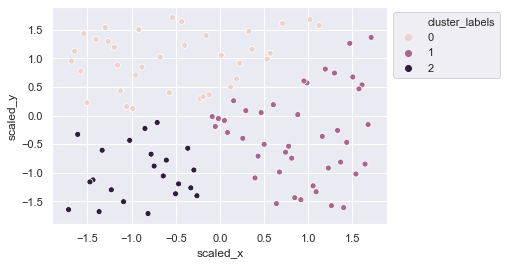

In [32]:
#vídeo

print("""Why k-means clustering?:
 - A critical drawback of hierarchical clustering: runtime
 - K means runs signicantly faster on large datasets\n""")

plot_1('kmeans_step1', right=1.4)
plot_2('kmeans_step2', 'kmeans_distortion')

print("""A note on distortions:
 - kmeans returns a single value of distortions
 - vq returns a list of distortions.""")

# Running k-means

# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

df['scaled_x'] = scale(df['x'])
df['scaled_y'] = scale(df['y'])

# Generate cluster centers and labels
cluster_centers, _ = kmeans(df[['scaled_x', 'scaled_y']], 3)

df['cluster_labels'], _ = vq(df[['scaled_x', 'scaled_y']], cluster_centers)

# Plot clusters
sns.scatterplot(x='scaled_x', y='scaled_y', hue='cluster_labels', data=df)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


Exercício 2

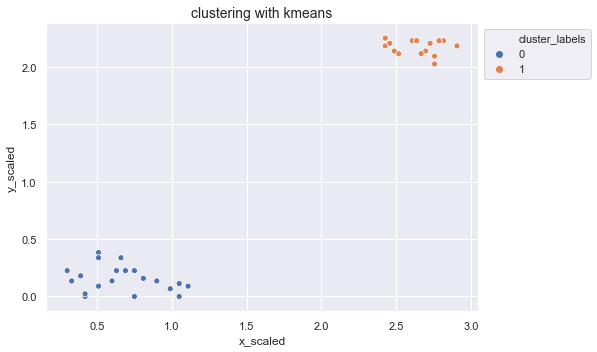

In [33]:
# K-means clustering: first exercise

# Recall the two steps of k-means clustering:
#  - Define cluster centers through kmeans() function. It has two required arguments: observations and number of clusters.
#  - Assign cluster labels through the vq() function. It has two required arguments: observations and cluster centers.
# The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X 
# and Y coordinates of people at a given point in time.

# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data = comic_con)
plt.title('clustering with kmeans', fontsize=14)

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.15, hspace=0.1)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Exercício 3

In [34]:
# Runtime of k-means clustering

# How long does it take to run the kmeans() function on the FIFA dataset?

%timeit kmeans(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 2)

print("""\nIt took about 5 seconds to run hierarchical clustering on this data, but only 50 milliseconds to run k-means
clustering.""")

40.8 ms ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

It took about 5 seconds to run hierarchical clustering on this data, but only 50 milliseconds to run k-means
clustering.


#### Exercício 4 - How many clusters?

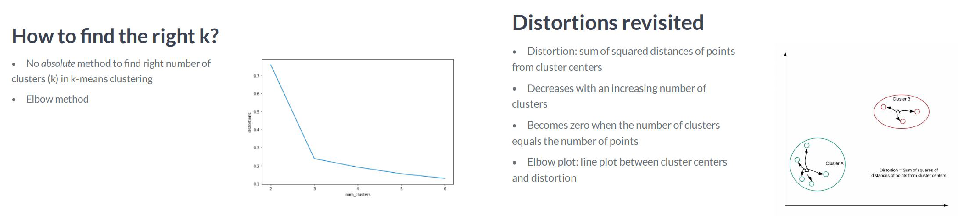

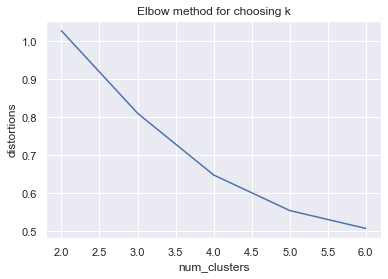

Final thoughts on using the elbow method:
 - Only gives an indication of optimal k (numbers of clusters)
 - Does not always pinpoint how many k (numbers of clusters)
 - Other methods: average silhouette and gap statistic


In [35]:
#vídeo

plot_2('elbow_method', 'distortions_revisited', wspace=0.1)

# Elbow method in Python

# Declaring variables for use
distortions = []
num_clusters = range(2, 7)

# Populating distortions for various clusters
for i in num_clusters:
    centroids, distortion = kmeans(df[['scaled_x', 'scaled_y']], i)
    distortions.append(distortion)
    
# Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot_data)
plt.title('Elbow method for choosing k')
plt.show()

print("""Final thoughts on using the elbow method:
 - Only gives an indication of optimal k (numbers of clusters)
 - Does not always pinpoint how many k (numbers of clusters)
 - Other methods: average silhouette and gap statistic""")

Exercício 5

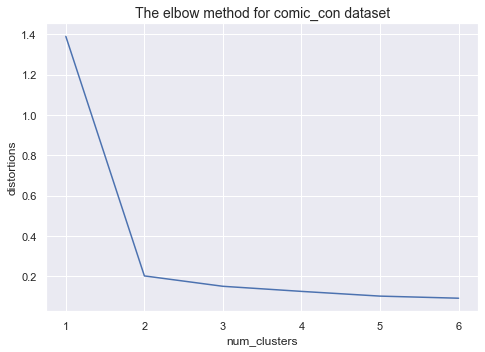

From the elbow plot there are 2 clusters in the data.


In [36]:
# Elbow method on distinct clusters

distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.title('The elbow method for comic_con dataset', fontsize=14)
plt.xticks(num_clusters)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.15, hspace=0.1)
plt.show()

print("""From the elbow plot there are 2 clusters in the data.""")

Exercício 6

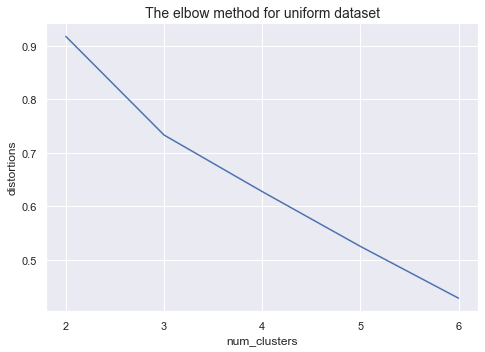

The number of clusters can not be defined here - There is no well defined elbow in this plot.


In [37]:
# Elbow method on uniform data

# Let us now see how the elbow plot looks on a data set with uniformly distributed points.

uniform_data = pd.DataFrame({'x_coordinate': [39, 42, 58, 43, 13, 32, 60, 13, 26, 27, 29, 51, 14, 50, 62, 59, 50,
       62, 65, 17, 25, 45, 55, 48, 42, 58, 68, 58, 37, 55],
                            'y_coordinate': [3, 7, 3, 3, 6, 5, 3, 4, 0, 9, 6, 3, 0, 7, 4, 1, 3, 0, 2, 5, 9, 5,
       8, 6, 3, 1, 4, 2, 8, 7]})

uniform_data['x_scaled'] = whiten(uniform_data['x_coordinate'])
uniform_data['y_scaled'] = whiten(uniform_data['y_coordinate'])
###############################################################################################

distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.title('The elbow method for uniform dataset', fontsize=14)
plt.xticks(num_clusters)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.15, hspace=0.1)
plt.show()

print("""The number of clusters can not be defined here - There is no well defined elbow in this plot.""")

#### Exercício 7 - Limitations of k-means clustering

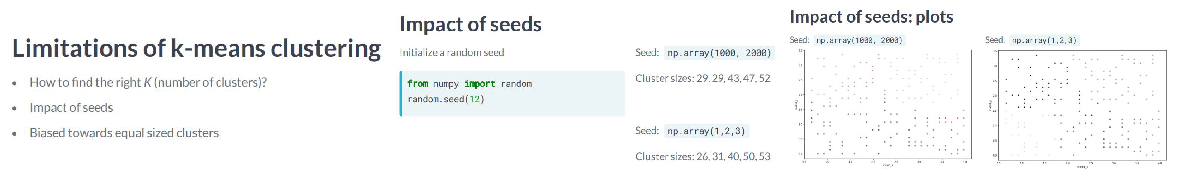

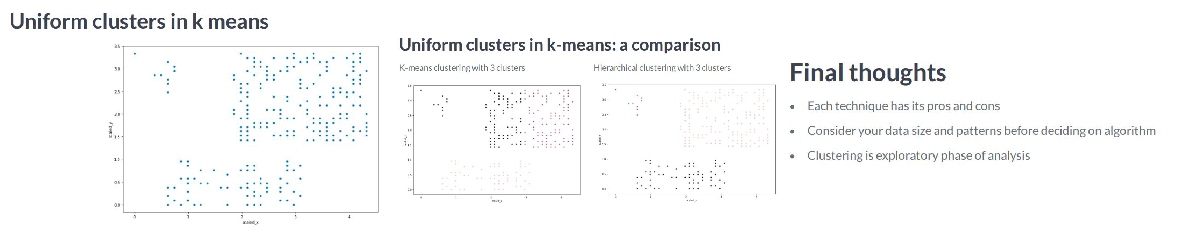

In [38]:
#vídeo

plot_3('kmeans_limitations', 'seeds_1', 'seeds_2')
plot_3('uniform_1', 'uniform_2', 'final_thought_kmeans')

Exercício 8

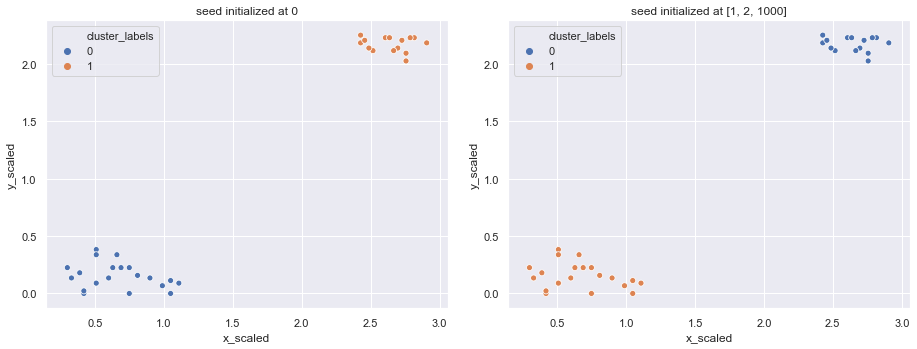

The plots have not changed after changing the seed as the clusters are well-defined.


In [39]:
# Impact of seeds on distinct clusters

# You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise, you will
# explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.

# The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X 
# and Y coordinates of people at a given point in time.

# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
plt.subplot(1, 2, 1)
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data = comic_con)
plt.title('seed initialized at 0')


# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
plt.subplot(1, 2, 2)
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data = comic_con)
plt.title('seed initialized at [1, 2, 1000]')

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.15, hspace=0.1)
plt.show()
print("""The plots have not changed after changing the seed as the clusters are well-defined.""")

Exercício 9

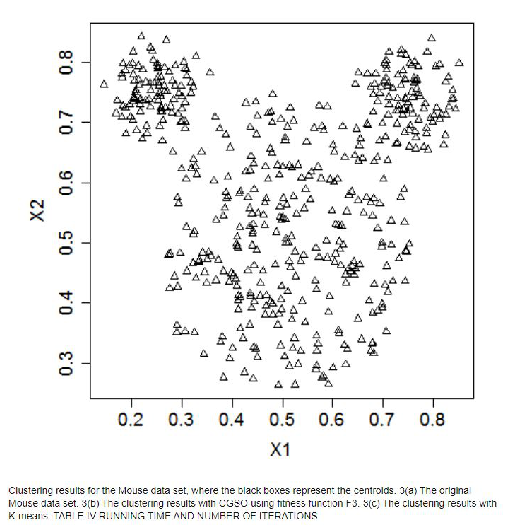

In [40]:
# Uniform clustering patterns

# Now that you are familiar with the impact of seeds, let us look at the **bias** in k-means clustering towards the 
# formation of uniform clusters.

# Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points that resemble the head
# of a mouse: it has three clusters of points arranged in circles, one each for the face and two ears of a mouse.

# Here is how a typical mouse-like dataset looks like: 
plot_1('mouse_clustering', right=1.6, bottom=-0.8)

Source: https://www.researchgate.net/figure/Clustering-results-for-the-Mouse-data-set-where-the-black-boxes-represent-the-centroids_fig3_256378655"

In [41]:
# The data is stored in a Pandas data frame, mouse. x_scaled and y_scaled are the column names of the standardized X and 
# Y coordinates of the data points.

mouse = pd.DataFrame({'x_coordinate': [33.87552801, 38.20874789, 35.74058788, 32.54696343, 62.06314583,
       53.76968389, 32.49035022, 55.32520176, 68.10254176, 53.28312355,
       67.71803005, 32.84550285, 61.78083409, 62.07246733, 37.2423105 ,
       48.39279681, 35.48978845, 65.60854566, 38.02888394, 65.49367503,
       41.60372439, 48.41398475, 41.8196699 , 51.7691827 , 45.17995059,
       38.02218597, 56.37185206, 52.05250382, 44.24373638, 40.3328119 ,
       53.5965755 , 45.87265296, 54.0000117 , 52.6886879 , 53.25422918,
       63.54212627, 65.38884629, 49.73312042, 48.58080531, 48.03000662,
       44.6671251 , 65.30935896, 40.58584807, 43.93533778, 32.87374964,
       43.17638646, 61.44735547, 47.90212636, 47.57275054, 50.65221647,
       45.44652101, 48.17757171, 50.11893028, 37.33082581, 53.28605845,
       32.60601743, 46.59545712, 54.91413224, 61.18758173, 62.256238  ,
       47.80710345, 65.44265167, 36.17446485, 60.90339818, 44.23811688,
       40.34232189, 57.19910238, 36.08806305, 35.56663867, 42.41968177,
       59.65269146, 32.62462929, 55.80216992, 65.4991867 , 45.54670964,
       61.00536902, 58.19939104, 63.11931771, 55.31708313, 45.60947216,
       45.63141645, 46.74818575, 68.28352429, 61.96714675, 48.96104619,
       45.37856388, 50.84116864, 52.56595621, 39.13493121, 48.99176373,
       58.05200858, 41.37122591, 64.35140055, 35.02226785, 48.60847435,
       42.64864932, 57.58495149, 49.08107021, 51.42659241, 62.31551719,
       26.84075282, 26.9519412 , 32.56213982, 27.10884541, 20.77972888,
       34.64864231, 27.3347144 , 38.63528806, 27.36278088, 22.25173068,
       23.56181791, 28.68340206, 33.84077613, 28.22316026, 38.08583938,
       29.88562784, 28.40850494, 31.72078699, 25.2107398 , 28.67688927,
       32.24862075, 26.38752714, 28.69901004, 26.07549743, 34.28710983,
       24.02682404, 30.83187787, 32.37571559, 22.76230802, 35.25122351,
       70.18239123, 79.58988482, 65.72716493, 68.483399  , 76.41358468,
       79.26874523, 64.84182259, 71.11774102, 78.34020408, 63.61846311,
       67.53968321, 69.15087805, 67.7921338 , 76.87140431, 62.00437158,
       67.49125961, 71.90747913, 65.27576084, 77.58529515, 79.66066418,
       77.3246352 , 68.5790018 , 65.97649575, 71.55575552, 69.83671683,
       70.49432188, 72.62743438, 67.66970193, 63.44559189, 75.45783601],
                     'y_coordinate': [44.89342095, 41.11632695, 57.41800588, 57.21808249, 47.19694448,
       35.95195917, 42.02185361, 52.54832221, 52.31212456, 31.63628689,
       47.60524807, 54.23496141, 60.8249876 , 65.23558661, 48.23757709,
       67.52456486, 54.10211414, 51.8513512 , 39.82817721, 44.28386899,
       60.21348801, 45.35513786, 35.81066079, 56.95992181, 61.05673695,
       44.3455702 , 49.53371078, 57.76601798, 41.7427565 , 52.07742897,
       55.58701182, 43.81629667, 61.46690781, 44.37759236, 44.72275113,
       47.98225455, 47.73690086, 46.04982378, 56.78708413, 56.60380297,
       61.71604212, 56.52781557, 45.81317068, 49.10776882, 41.14505632,
       64.84595737, 62.46952021, 58.29912471, 48.53320807, 48.79467674,
       40.65821118, 30.46658829, 65.18053982, 41.7300068 , 69.24321762,
       56.00106984, 39.63738121, 38.40458709, 39.63915235, 38.73957078,
       36.00996935, 45.62729042, 57.17020665, 51.32130045, 40.89880525,
       41.15484687, 58.21497749, 43.45728537, 42.72274718, 39.27124659,
       42.66172394, 57.40714755, 34.25546896, 61.29461186, 30.51392786,
       65.03769516, 63.37885691, 62.92620573, 35.88019397, 52.89656063,
       37.25902081, 31.67028002, 47.16555533, 50.88239704, 41.7797539 ,
       49.38557057, 52.58865855, 40.89034886, 65.91171887, 46.57669291,
       63.55568215, 45.4501224 , 43.70526533, 46.58949707, 38.91660456,
       55.46764508, 67.89462117, 36.02362381, 59.98536063, 54.70049854,
       82.72356822, 77.94443633, 75.40050307, 68.91634077, 72.8427495 ,
       74.71747016, 70.61496975, 76.12679438, 80.60280865, 70.19696262,
       68.23133123, 83.83579387, 83.97371743, 70.71122299, 72.22425104,
       79.61715462, 74.81720151, 81.28549433, 79.83947613, 82.5450522 ,
       72.41216494, 74.6039565 , 68.84261456, 73.2893676 , 80.51600557,
       82.63965729, 66.38754732, 73.35737436, 72.53759838, 73.71960775,
       78.16166533, 75.99349931, 67.23738628, 82.50606009, 77.72556254,
       73.68057343, 83.33967753, 84.67897398, 71.78110972, 68.16591019,
       83.87925655, 74.22367682, 78.15268345, 74.21207007, 75.13106436,
       77.71960453, 71.08256275, 74.66344797, 80.3555998 , 73.34017066,
       70.12614603, 77.46797551, 77.65232497, 76.70948616, 73.94355101,
       71.19864361, 76.43418687, 70.62890953, 78.5744389 , 68.44893502]})

mouse['x_scaled'] = whiten(mouse['x_coordinate'])
mouse['y_scaled'] = whiten(mouse['y_coordinate'])

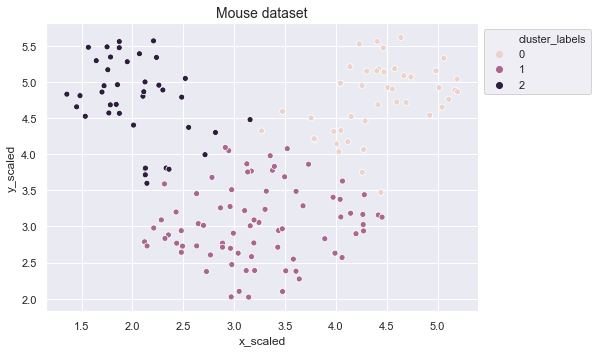

Notice that kmeans is unable to capture the three visible clusters clearly, and the two clusters towards the top 
have taken in some points along the boundary. This happens due to the underlying assumption in kmeans algorithm to minimize
distortions which leads to clusters that are similar in terms of area.


In [42]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled', 'y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data = mouse)
plt.title('Mouse dataset', fontsize=14)
plt.legend(bbox_to_anchor=(1, 1))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.15, hspace=0.1)
plt.show()

print("""Notice that kmeans is unable to capture the three visible clusters clearly, and the two clusters towards the top 
have taken in some points along the boundary. This happens due to the underlying assumption in kmeans algorithm to minimize
distortions which leads to clusters that are similar in terms of area.""")

Exercício 10

                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


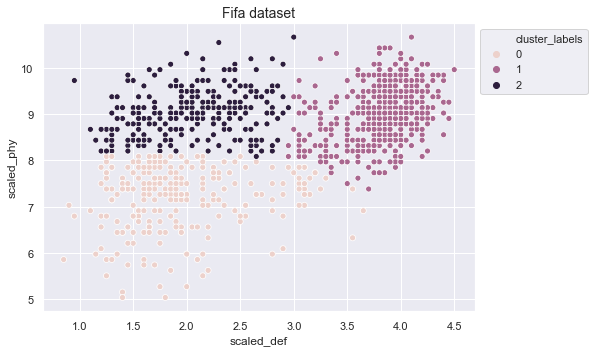

 Notice that the seed has an impact on clustering as the data is uniformly distributed.


In [43]:
# FIFA 18: defenders revisited

# In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:
#  - defending: a number which signifies the defending attributes of a player
#  - physical: a number which signifies the physical attributes of a player
# These are typically defense-minded players. In this exercise, you will perform clustering based on these attributes in 
# the data.

fifa = pd.read_csv(data_folder + "fifa_18_sample_data.csv")
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])
##############################################################################################################

# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)

plt.title('Fifa dataset', fontsize=14)
plt.legend(bbox_to_anchor=(1, 1))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.15, hspace=0.1)
plt.show()

print(""" Notice that the seed has an impact on clustering as the data is uniformly distributed.""")

# Chapter 4 - Clustering in Real World

Now that you are familiar with two of the most popular clustering techniques, this chapter helps you apply this knowledge to real-world problems. The chapter first discusses the process of finding dominant colors in an image, before moving on to the problem discussed in the introduction - clustering of news articles. The chapter concludes with a discussion on clustering with multiple variables, which makes it difficult to visualize all the data.

#### Exercício 1 - Dominant colors in images

Sources:
- http://www.datagenetics.com/blog/march12012/index.html (about Steganography - art and science of hiding messages in a covert way)
- https://pdfs.semanticscholar.org/a4ab/fd2be3f73577f526db70254624346c3ca3aa.pdf (paper K-Means on Satellite Image Classification)
    
    

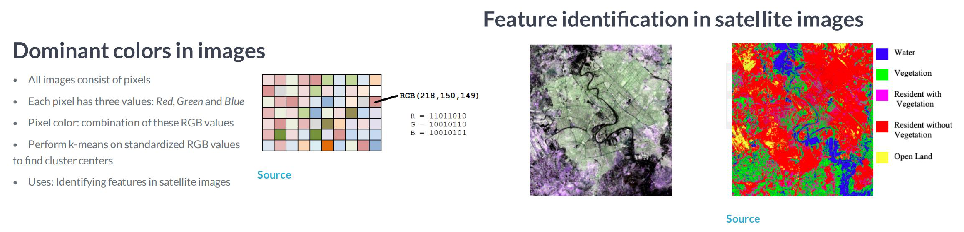


Image to analyse:


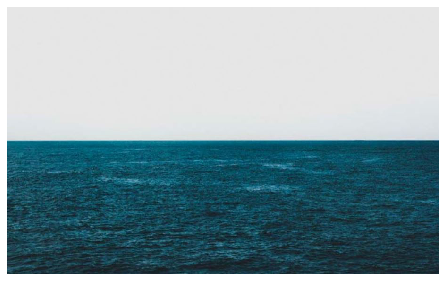

(566, 915, 3)
   red  blue  green  scaled_red  scaled_blue  scaled_green
0  230   230    230     2.20549     3.143087      2.875267
1  230   230    230     2.20549     3.143087      2.875267
2  230   230    230     2.20549     3.143087      2.875267
3  230   230    230     2.20549     3.143087      2.875267
4  230   230    230     2.20549     3.143087      2.875267 



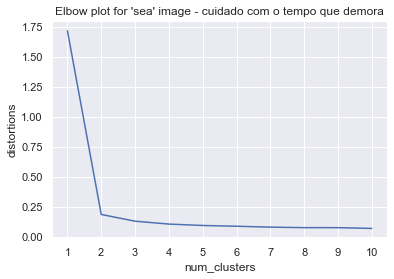

Display dominant colors (2 clusters)
[(0.07869362715369438, 0.3395520133399385, 0.2794959181435316), (0.8929653146660953, 0.8998711550969001, 0.8978603238431523)]


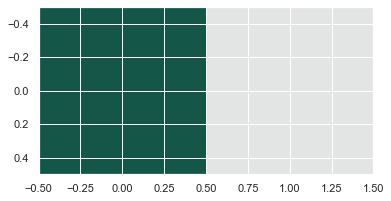

Wall time: 1min 56s


In [44]:
%%time
#vídeo

plot_2('dominant_colors', 'satellite_classification')

# Tools to nd dominant colors
#  - Convert image to pixels: matplotlib.image.imread
#  - Display colors of cluster centers: matplotlib.pyplot.imshow

print("===============================================================================================================")
##################################

print("\nImage to analyse:")
plot_1('sea')

# Convert image to RGB matrix
import matplotlib.image as img
image = img.imread(data_folder + 'sea.jpg')
print(image.shape)

r = []
g = []
b = []

for row in image:
    for pixel in row:
        # A pixel contains RGB values
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

# Data frame with RGB values
pixels = pd.DataFrame({'red': r, 'blue': b, 'green': g})
pixels['scaled_red'] = whiten(pixels['red'])
pixels['scaled_blue'] = whiten(pixels['blue'])
pixels['scaled_green'] = whiten(pixels['green'])
print(pixels.head(), "\n")


# Create an elbow plot
distortions = []
num_clusters = range(1, 11)

# Create a list of distortions from the kmeans method
for i in num_clusters:
    cluster_centers, distortion = kmeans(pixels[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)
    
# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.title("Elbow plot for 'sea' image - cuidado com o tempo que demora")
plt.xticks(num_clusters)
plt.show()

########################################################################################

# Find dominant colors
cluster_centers, _ = kmeans(pixels[['scaled_red', 'scaled_blue', 'scaled_green']], 2)
colors = []

# Find Standard Deviations
r_std, g_std, b_std = pixels[['red', 'blue', 'green']].std()

# Scale actual RGB values in range of 0-1
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((scaled_r * r_std/255, scaled_g * g_std/255, scaled_b * b_std/255)) # 255 is the maximum range of RGB

#########################
    
# Display dominant colors

print("Display dominant colors (2 clusters)")

# Dimensions: 2 x 3 (N X 3 matrix)
print(colors)

#Dimensions: 1 x 2 x 3 (1 X N x 3 matrix)
plt.imshow([colors])
plt.show()

In [45]:
# range 0 - 255
print(pixels.red.max())
print(pixels.blue.max())
print(pixels.green.max())
print("")
print(pixels.red.min())
print(pixels.blue.min())
print(pixels.green.min())

232
243
232

0
26
23


Exercício 2

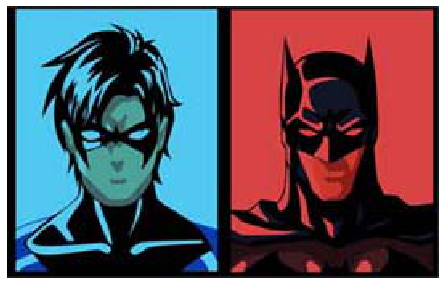

In [46]:
# Extract RGB values from image

# There are broadly three steps to find the dominant colors in an image:

#  - Extract RGB values into three lists.
#  - Perform k-means clustering on scaled RGB values.
#  - Display the colors of cluster centers.

# To extract RGB values, we use the imread() function of the image class of matplotlib. Empty lists, r, g and b have 
# been initialized.

# For the purpose of finding dominant colors, we will be using the following image:
plot_1('batman')

In [47]:
# Read batman image and print dimensions
batman_image = img.imread(data_folder + 'batman.jpg')

print(batman_image.shape)

# Store RGB values of all pixels in lists r, g and b
r = []
g = []
b = []

for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

# You have successfully extracted the RGB values of the image into three lists, one for each color channel.

(169, 269, 3)


Exercício 3

In [48]:
# How many dominant colors?

# The RGB values are stored in a data frame, batman_df. The RGB values have been standardized used the whiten() function,
# stored in columns, scaled_red, scaled_blue and scaled_green.

# Data frame with RGB values
batman_df = pd.DataFrame({'red': r, 'blue': b, 'green': g})
batman_df['scaled_red'] = whiten(batman_df['red'])
batman_df['scaled_blue'] = whiten(batman_df['blue'])
batman_df['scaled_green'] = whiten(batman_df['green'])

batman_df.head()

red  blue  green  scaled_red  scaled_blue  scaled_green
0   36    25     28    0.450157     0.279912      0.370103
1   39    19     21    0.487671     0.212733      0.277577
2   52    21     20    0.650227     0.235126      0.264359
3   61    28     27    0.762767     0.313502      0.356885
4   37    18     15    0.462662     0.201537      0.198269

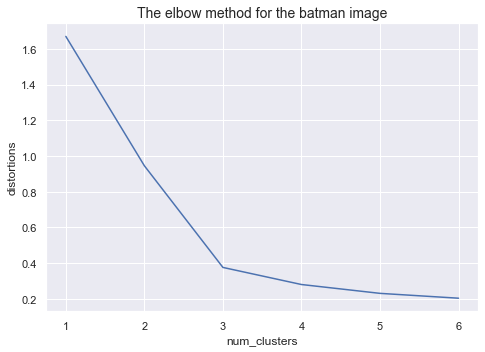

There are 3 distinct colors present in the image, which is supported by the elbow plot.

Wall time: 3.48 s


In [49]:
%%time
# Construct an elbow plot with the data frame. How many dominant colors are present?

distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)

plt.title('The elbow method for the batman image', fontsize=14)
plt.xticks(num_clusters)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.15, hspace=0.1)
plt.show()

print("""There are 3 distinct colors present in the image, which is supported by the elbow plot.\n""")

Exercício 4

In [50]:
sns.set_style("ticks")

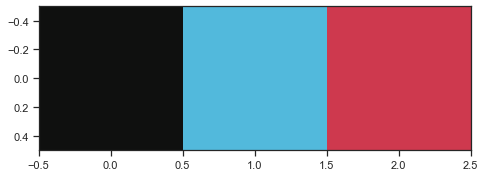

In [51]:
# Display dominant colors

cluster_centers, _ = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], 3)
colors = []

# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((scaled_r * r_std / 255, scaled_g * g_std / 255, scaled_b * b_std / 255))

# Display colors of cluster centers
plt.imshow([colors])

plt.subplots_adjust(left=0, bottom=-1, right=1, top=1, wspace=0.15, hspace=0.1)
plt.show()

#### Exercício 5 - Document clustering

Sources:
- http://brandonrose.org/clustering (Document Clustering with Python)
- https://www.geeksforgeeks.org/sparse-matrix-representation/ (Sparse Matrix representation)

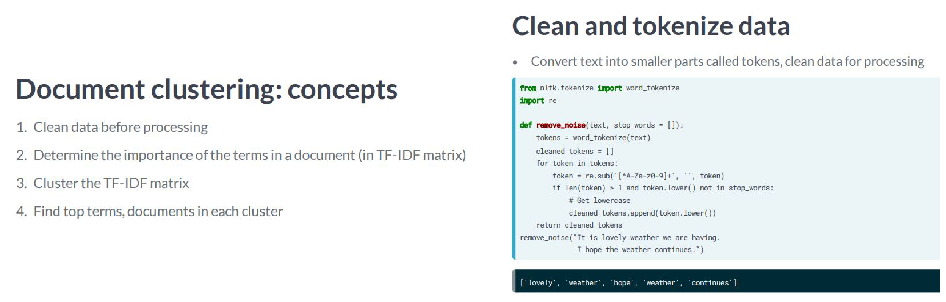

['it', 'is', 'lovely', 'weather', 'we', 'are', 'having', 'hope', 'the', 'weather', 'continues']


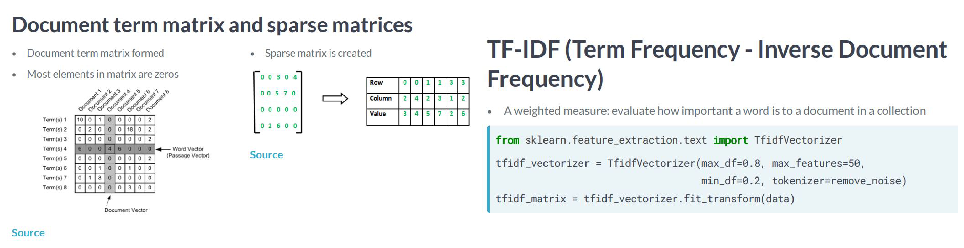

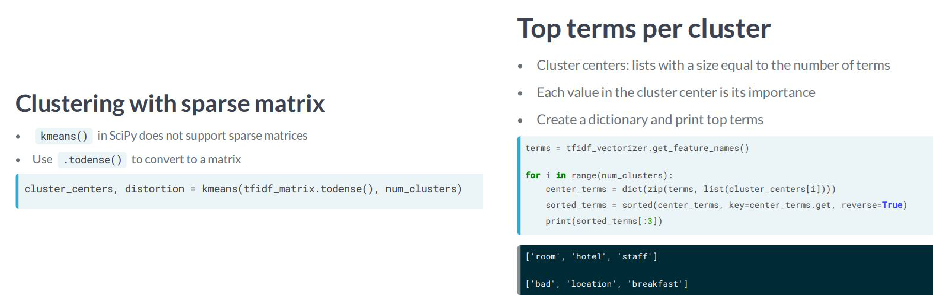

['that', 'him', 'by']
['by', 'an', 'who']
['her', 'she', 'that']

More considerations:
 - Work with hyperlinks, emoticons etc.
 - Normalize words (run, ran, running -> run)
 - .todense() may not work with large datasets


In [52]:
#vídeo

# data
movies = pd.read_csv(data_folder + 'movies_plot.csv')

plot_2('document_clustering', 'clean_tokenize')

##############################################################################################################

from nltk.tokenize import word_tokenize
import re

# tokenize and clean the data
def remove_noise(text, stop_words = []):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            # Get lowercase
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

print(remove_noise("It is lovely weather we are having. I hope the weather continues."))

##############################################################################################################

plot_2('document_matrix', 'tf_idf')

# TF-IDF (Term Frequency -Inverse Document Frequency)
# A weighted measure: evaluate how important a word is to a document in a collection

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=50, min_df=0.2, tokenizer=remove_noise)

# max_df & min_df ---> maximum and minimum fraction of documents a word should appear
# max_features ---> the top (50 in this case) number of terms

tfidf_matrix = tfidf_vectorizer.fit_transform(movies['Plot'])


##############################################################################################################

plot_2('clustering_sparse_matrix', 'top_terms_per_cluster')

# Clustering with sparse matrix
#  - kmeans() in SciPy does not support sparse matrices
#  - Use .todense() to convert to a matrix

num_clusters = 3
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# --> we do not use the elbow plot since it would take an erratic form, due to the high number of variables

# Top terms per cluster
#  - Cluster centers: lists with a size equal to the number of terms
#  - Each value in the cluster center is its importance
#  - Create a dictionary and print top terms

terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

print("""\nMore considerations:
 - Work with hyperlinks, emoticons etc.
 - Normalize words (run, ran, running -> run)
 - .todense() may not work with large datasets""")

Exercício 6

In [53]:
%%time
# TF-IDF of movie plots

# data: movie plots
plots = list(movies['Plot'])

# Let us use the plots of randomly selected movies to perform document clustering on. Before performing clustering on 
# documents, they need to be cleaned of any unwanted noise (such as special characters and stop words) and converted into 
# a sparse matrix through TF-IDF of the documents.

# Use the TfidfVectorizer class to perform the TF-IDF of movie plots stored in the list plots. The remove_noise() function
# is available to use as a tokenizer in the TfidfVectorizer class. The .fit_transform() method fits the data into the 
# TfidfVectorizer objects and then generates the TF-IDF sparse matrix.

# adicionei eu
from nltk.corpus import stopwords

def remove_noise(text, stop_words = stopwords.words('english')):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            # Get lowercase
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

##################################################################################################

# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.75, max_features=50, tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)   # creating the sparse matrix


Wall time: 9.59 s


Exercício 7

In [54]:
# Top terms in movie clusters

# Now that you have created a sparse matrix, generate cluster centers and print the top three terms in each cluster. Use
# the .todense() method to convert the sparse matrix, tfidf_matrix to a normal matrix for the kmeans() function to process.
# Then, use the .get_feature_names() method to get a list of terms in the tfidf_vectorizer object. The zip() function in 
# Python joins two lists.

# With a higher number of data points, the clusters formed would be defined more clearly. However, this requires some 
# computational power, making it difficult to accomplish in an exercise here.

num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, cluster_centers[i]))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])


['film', 'wife', 'life']
['back', 'two', 'one']


#### Exercício 8 - Clustering with many features

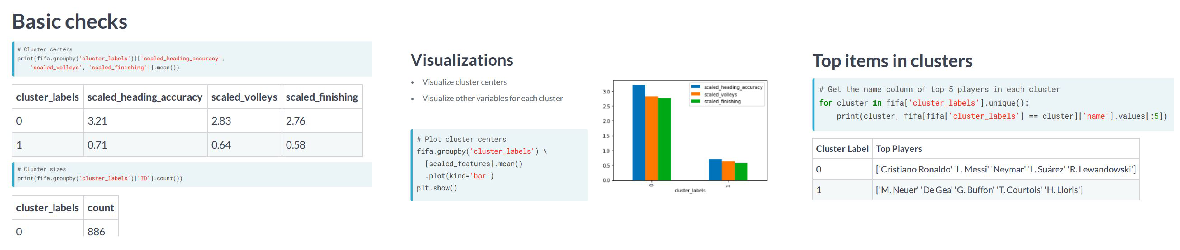

Cluster centers (I used hierarchical clustering here):

                scaled_heading_accuracy  scaled_volleys  scaled_finishing
cluster_labels                                                           
1                              0.682484        0.638146          0.581126
2                              3.209080        2.830362          2.762195
Cluster sizes:
cluster_labels
1    113
2    887
Name: ID, dtype: int64

We chose 3 attacking features, so goalkeepers (1 cluster) have it low


Visualizations:


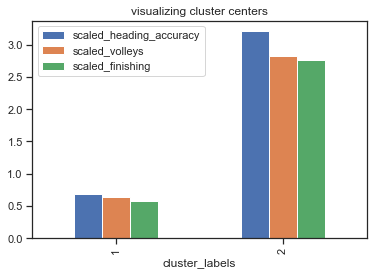


Top items in clusters:
2 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'R. Lewandowski']
1 ['M. Neuer' 'De Gea' 'T. Courtois' 'G. Buffon' 'J. Oblak']

Feature reduction:
 - Factor analysis
 - Multidimensional scaling


In [55]:
#vídeo

fifa = pd.read_csv(data_folder + "fifa_18_sample_data.csv")
fifa['scaled_heading_accuracy'] = whiten(fifa['heading_accuracy'])
fifa['scaled_volleys'] = whiten(fifa['volleys'])
fifa['scaled_finishing'] = whiten(fifa['finishing'])
scaled_features = ['scaled_heading_accuracy', 'scaled_volleys', 'scaled_finishing']
distance_matrix = linkage(fifa[scaled_features], 'average')
fifa['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')
#####################################################################################################################

plot_3('basic_checks', 'visualizations', 'top_items_fifa', wspace=0.1)

# Basic checks

# Cluster centers
print("Cluster centers (I used hierarchical clustering here):\n")
print(fifa.groupby('cluster_labels')[['scaled_heading_accuracy', 'scaled_volleys', 'scaled_finishing']].mean())

# Cluster sizes
print("Cluster sizes:")
print(fifa.groupby('cluster_labels')['ID'].count())

print("\nWe chose 3 attacking features, so goalkeepers (1 cluster) have it low")

print("\n===========================================================================================================\n")
#################################################################

# Visualizations

# Plot cluster centers
print("Visualizations:")
fifa.groupby('cluster_labels')[scaled_features].mean().plot(kind='bar')
plt.title('visualizing cluster centers')
plt.show()

print("===========================================================================================================\n")
#################################################################

# Top items in clusters
print("Top items in clusters:")

# Get the name column of top 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])
    
print("""\n==================================================================================================
Feature reduction:
 - Factor analysis
 - Multidimensional scaling""")

Exercício 9

In [56]:
# Clustering with many features

# What should you do if you have too many features for clustering?
print("Reduce features using a technique like Factor Analysis")

Reduce features using a technique like Factor Analysis


Exercício 10

In [57]:
# Basic checks on clusters

# In the FIFA 18 dataset, we have concentrated on defenders in previous exercises. Let us try to focus on attacking
# attributes of a player. Pace (pac), Dribbling (dri) and Shooting (sho) are features that are present in attack minded 
# players. In this exercise, k-means clustering has already been applied on the data using the scaled values of these three
# attributes. Try some basic checks on the clusters so formed.

# The data is stored in a Pandas data frame, fifa. The scaled column names are present in a list scaled_features. The 
# cluster labels are stored in the cluster_labels column. 

fifa = pd.read_csv(data_folder + "fifa_18_sample_data.csv")
fifa['scaled_pac'] = whiten(fifa['pac'])
fifa['scaled_dri'] = whiten(fifa['dri'])
fifa['scaled_sho'] = whiten(fifa['sho'])
scaled_features = ['scaled_pac', 'scaled_dri', 'scaled_sho']

# vou usar hierarchical clustering
distance_matrix = linkage(fifa[scaled_features], 'average')
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

#############

# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count(), "\n")

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels').mean()['eur_wage'])


cluster_labels
1    810
2    160
3     30
Name: ID, dtype: int64 

cluster_labels
1    71064.197531
2    65212.500000
3    47866.666667
Name: eur_wage, dtype: float64


Exercício 11

                scaled_pac  scaled_sho  scaled_pas  scaled_dri  scaled_def  \
cluster_labels                                                               
0                 6.684477    5.433653    8.456695    8.516572    2.496427   
1                 5.461627    3.673869    7.180554    6.775813    3.966748   

                scaled_phy  
cluster_labels              
0                 8.332794  
1                 9.206925  


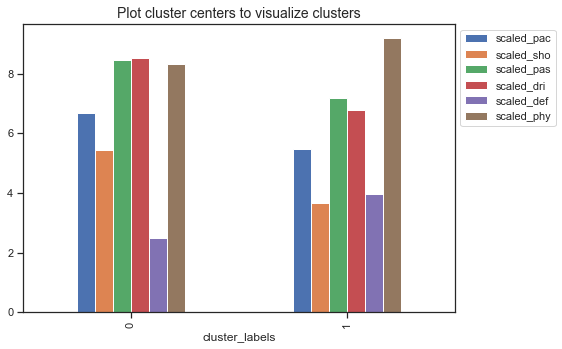

Top 5 players in each cluster:
0 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
1 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']

Notice the top players in each cluster are representative of the overall characteristics of the cluster - one of 
the clusters primarily represents attackers, whereas the other represents defenders. Surprisingly, a top goalkeeper Manuel
Neuer is seen in the attackers group, but he is known for going out of the box and participating in open play, which are 
reflected in his FIFA 18 attributes.


In [58]:
# FIFA 18: what makes a complete player?

# The overall level of a player in FIFA 18 is defined by six characteristics: pace (pac), shooting (sho), passing (pas),
# dribbling (dri), defending (def), physical (phy).

# In this exercise, you will use all six characteristics to create clusters. The data for this exercise is stored in a 
# Pandas dataframe, fifa. features is the list of these column names and scaled_features is the list of columns which 
# contains their scaled values. 

# now with kmeans
fifa = pd.read_csv(data_folder + "fifa_18_sample_data.csv")

# selected features
features = ['pac', 'sho', 'pas', 'dri', 'def', 'phy']

# scaling
scaled_features = []
for i in features:    
    fifa['scaled_' + i] = whiten(fifa[i])
    scaled_features.append("scaled_" + i)
    
    
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)


# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)


# Print cluster centers
print(fifa.groupby('cluster_labels')[scaled_features].mean())


# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')

plt.title('Plot cluster centers to visualize clusters', fontsize=14)
plt.legend(bbox_to_anchor=(1, 1))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.15, hspace=0.1)
plt.show()


# Get the name column of top 5 players in each cluster
print("Top 5 players in each cluster:")
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])


print("""\nNotice the top players in each cluster are representative of the overall characteristics of the cluster - one of 
the clusters primarily represents attackers, whereas the other represents defenders. Surprisingly, a top goalkeeper Manuel
Neuer is seen in the attackers group, but he is known for going out of the box and participating in open play, which are 
reflected in his FIFA 18 attributes.""")

#### Exercício 12 - end

In [59]:
#vídeo

# Fim